## `Deep Learning on Custom Images of Dogs and Cats`

In [130]:
import cv2
import matplotlib.pyplot as plt

In [131]:
cat1 = cv2.imread("./CATS_DOGS/CATS_DOGS/train/CAT/1.jpg")

In [132]:
cat1.shape

(281, 300, 3)

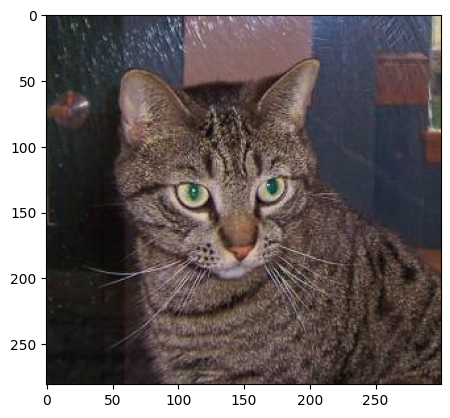

In [133]:
cat1 = cv2.cvtColor(cat1, cv2.COLOR_BGR2RGB)

plt.imshow(cat1)

In [134]:
dog2 = cv2.imread("./CATS_DOGS/CATS_DOGS/train/DOG/2.jpg")

In [135]:
dog2.shape

(199, 188, 3)

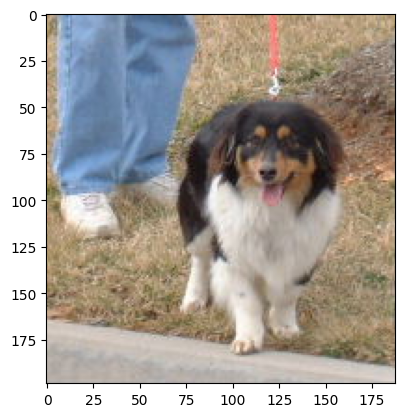

In [136]:
dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)

plt.imshow(dog2)

## Preprocessing the Images

In [137]:
from keras.preprocessing.image import ImageDataGenerator

In [138]:
image_gen = ImageDataGenerator(rotation_range=30,  # rotate the image 30 degrees
                               width_shift_range=0.1,  # Shift the pic width by a max of 10%
                               height_shift_range=0.1,  # Shift the pic height by a max of 10%
                               rescale=1/255,  # Rescale the image by normalzing it.
                               shear_range=0.2,  # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2,  # Zoom in by 20% max
                               horizontal_flip=True,  # Allow horizontal flipping
                               fill_mode="nearest"  # Fill in missing pixels with the nearest filled value
                               )

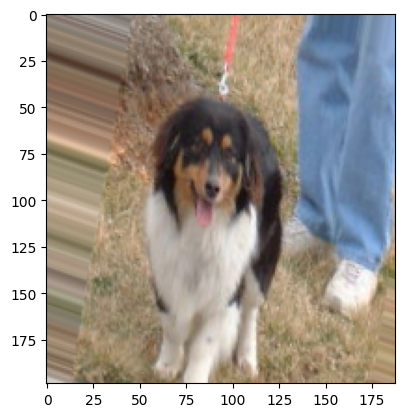

In [139]:
plt.imshow(image_gen.random_transform(dog2))

This is a generator that will read pictures found in subfolers of 'data/train', and indefinitely generate batches of augmented image data

In [140]:
image_gen.flow_from_directory("./CATS_DOGS/CATS_DOGS/train/")

Found 18743 images belonging to 2 classes.


## Building the Model

In [141]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

### Model Architecture

In [142]:
input_shape = (150, 150, 3)

In [143]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3),
          input_shape=input_shape, activation="relu"))
# Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3),
          input_shape=input_shape, activation="relu"))
# Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3),
          input_shape=input_shape, activation="relu"))
# Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1))
model.add(Activation("sigmoid"))

### Compiling the Model

In [144]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

### Model Summary

In [145]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 32)      

## Training the Model

In [146]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory("./CATS_DOGS/CATS_DOGS/train/",
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode="binary"
                                                )

test_image_gen = image_gen.flow_from_directory("./CATS_DOGS/CATS_DOGS/test/",
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode="binary"
                                                )

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [147]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [148]:
results = model.fit(train_image_gen,
                              epochs=4,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                              validation_steps=12
                              )

Epoch 1/4
150/150 [==============================] - 42s 277ms/step - loss: 0.6963 - accuracy: 0.5254 - val_loss: 0.6863 - val_accuracy: 0.5625
Epoch 2/4
150/150 [==============================] - 40s 266ms/step - loss: 0.6879 - accuracy: 0.5400 - val_loss: 0.6951 - val_accuracy: 0.5833
Epoch 3/4
150/150 [==============================] - 38s 252ms/step - loss: 0.6765 - accuracy: 0.5888 - val_loss: 0.6610 - val_accuracy: 0.5625
Epoch 4/4
150/150 [==============================] - 37s 247ms/step - loss: 0.6644 - accuracy: 0.6029 - val_loss: 0.6261 - val_accuracy: 0.6615


In [149]:
results.history["accuracy"]

[0.5254166722297668,
 0.5400000214576721,
 0.5887500047683716,
 0.6029166579246521]

## Predicting on New Images

In [156]:
dog_file = "./CATS_DOGS/CATS_DOGS/train/DOG/2.jpg"

In [157]:
import keras.utils as image

dog_img = image.load_img(dog_file, target_size=input_shape)

dog_img = image.img_to_array(dog_img)

In [158]:
dog_img.shape

(150, 150, 3)

In [159]:
import numpy as np

dog_img = np.expand_dims(dog_img, axis=0)

In [160]:
dog_img.shape

(1, 150, 150, 3)

In [161]:
dog_img = dog_img/255

In [164]:
model.predict(dog_img) > 0.5

1/1 [==============================] - 0s 22ms/step


array([[ True]])